In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
import glob
from datetime import datetime,timedelta
import re

import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['font.family']=['NanumGothic', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

In [3]:
files = glob.glob('G:\내 드라이브\Colab Notebooks\데이터분석\.data\교통사고정보개방시스템\*')
files

['G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\교통사고정보개방시스템\\Stt_CodeList.xlsx',
 'G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\교통사고정보개방시스템\\10_21_stt.csv',
 'G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\교통사고정보개방시스템\\~$10_21_stt.csv',
 'G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\교통사고정보개방시스템\\~$Stt_CodeList.xlsx']

In [4]:
meta_df = pd.read_excel(files[0],sheet_name=[0,1,2])
df = pd.read_csv(files[1],encoding='cp949')
df.head()

,연도,대상사고 구분명,법정동코드,사고건수,사고건수 구성비,사망자수,사망자수 구성비,치사율,부상자수,부상자수 구성비,...,중앙선 침범,신호위반,안전거리 미확보,안전운전 의무 불이행,보행자 보호의무 위반,기타,차대사람,차대차,차량단독,철길건널목
0,2010,전체,1100,41662,18.36,429,7.79,1.03,59718,16.94,...,1576.0,5202.0,6619.0,22088.0,2079.0,2908.0,10783.0,29579.0,1300.0,0.0
1,2010,어린이사고,1100,1930,13.69,14,11.11,0.73,2154,12.54,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010,노인사고,1100,3528,13.67,125,7.13,3.54,3584,13.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010,보행자사고,1100,10946,21.70,228,10.95,2.08,11233,22.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010,자전거사고,1100,998,37.48,12,16.44,1.20,1036,37.93,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
sido_meta = meta_df[1]
gugun_meta = meta_df[2]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34781 entries, 0 to 34780
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   연도            34781 non-null  int64  
 1   대상사고 구분명      34781 non-null  object 
 2   법정동코드         34781 non-null  int64  
 3   사고건수          34781 non-null  int64  
 4   사고건수 구성비      34781 non-null  float64
 5   사망자수          34781 non-null  int64  
 6   사망자수 구성비      34781 non-null  float64
 7   치사율           34781 non-null  float64
 8   부상자수          34781 non-null  int64  
 9   부상자수 구성비      34781 non-null  float64
 10  인구10만명당 사고건수  2952 non-null   float64
 11  자동차1만대당 사고건수  2952 non-null   float64
 12  과속            2941 non-null   float64
 13  중앙선 침범        2952 non-null   float64
 14  신호위반          2952 non-null   float64
 15  안전거리 미확보      2952 non-null   float64
 16  안전운전 의무 불이행   2952 non-null   float64
 17  보행자 보호의무 위반   2952 non-null   float64
 18  기타            2952 non-nul

In [43]:
df.describe()

,연도,법정동코드,사고건수,사고건수 구성비,사망자수,사망자수 구성비,치사율,부상자수,부상자수 구성비,인구10만명당 사고건수,...,중앙선 침범,신호위반,안전거리 미확보,안전운전 의무 불이행,보행자 보호의무 위반,기타,차대사람,차대차,차량단독,철길건널목
count,34781.000000,34781.000000,34781.000000,34781.000000,34781.000000,34781.000000,34781.000000,34781.000000,34781.000000,2952.000000,...,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000
mean,2015.551537,1687.928582,322.534832,0.856790,8.354446,0.856862,4.287259,448.905839,0.856795,450.292456,...,90.011179,204.780488,173.365515,996.333672,117.669038,139.147019,376.900745,1325.077913,82.593496,0.041667
std,3.465533,425.165174,1570.288263,2.134883,31.906347,2.478376,7.703811,2318.223311,2.140141,147.468367,...,213.401929,559.934081,495.164306,2515.507758,289.097315,342.083690,985.440150,3355.062152,193.838574,0.231298
min,2010.000000,1100.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.570000,...,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
25%,2013.000000,1319.000000,14.000000,0.150000,0.000000,0.000000,0.000000,16.000000,0.150000,351.285000,...,23.000000,18.000000,12.000000,161.000000,18.000000,22.000000,45.000000,194.750000,23.000000,0.000000
50%,2016.000000,1624.000000,49.000000,0.370000,2.000000,0.250000,1.940000,59.000000,0.360000,437.180000,...,39.000000,85.000000,59.000000,432.500000,43.000000,58.000000,152.000000,559.000000,38.000000,0.000000
75%,2019.000000,2003.000000,172.000000,0.740000,6.000000,0.670000,5.620000,212.000000,0.740000,532.482500,...,71.000000,184.000000,169.000000,850.000000,98.000000,122.000000,358.000000,1107.250000,62.000000,0.000000
max,2021.000000,2701.000000,55463.000000,43.140000,1039.000000,75.000000,200.000000,84508.000000,42.640000,1604.900000,...,2888.000000,7531.000000,6619.000000,29837.000000,4194.000000,4292.000000,11318.000000,43221.000000,2466.000000,3.000000


In [21]:
df.describe(include=np.object)

,대상사고 구분명
count,34781
unique,13
top,보행자사고
freq,2959


In [22]:
df.isnull().sum()

연도                  0
대상사고 구분명            0
법정동코드               0
사고건수                0
사고건수 구성비            0
사망자수                0
사망자수 구성비            0
치사율                 0
부상자수                0
부상자수 구성비            0
인구10만명당 사고건수    31829
자동차1만대당 사고건수    31829
과속              31840
중앙선 침범          31829
신호위반            31829
안전거리 미확보        31829
안전운전 의무 불이행     31829
보행자 보호의무 위반     31829
기타              31829
차대사람            31829
차대차             31829
차량단독            31829
철길건널목           31829
dtype: int64

## 전처리

In [7]:
df.fillna(0,inplace=True)

In [8]:
df = df[df['법정동코드']%100!=0].reset_index(drop=True)

In [9]:
gugun_dict = dict({2001:'경상남도',2004:'경상남도',2005:'경상남도'})

for i in range(len(gugun_meta)):
    code = gugun_meta['gugun 입력값'].loc[i]
    value = gugun_meta['구군명칭'].loc[i]
    gugun_dict[code] = value

In [10]:
sido_dict = dict()
for i in range(len(sido_meta)):
    code = sido_meta['Sido 입력값'].loc[i]//100*100
    value = sido_meta['종류'].loc[i]
    sido_dict[code] = value

In [11]:
df['구군'] = df['법정동코드'].apply(lambda x:gugun_dict[x])
df['시도'] = df['법정동코드'].apply(lambda x:sido_dict[x//100*100])

In [12]:
df.head()

,연도,대상사고 구분명,법정동코드,사고건수,사고건수 구성비,사망자수,사망자수 구성비,치사율,부상자수,부상자수 구성비,...,안전거리 미확보,안전운전 의무 불이행,보행자 보호의무 위반,기타,차대사람,차대차,차량단독,철길건널목,구군,시도
0,2010,전체,1101,1436,0.64,19,0.35,1.32,2009,0.58,...,240.0,767.0,60.0,104.0,377.0,998.0,61.0,0.0,종로구,서울특별시
1,2010,어린이사고,1101,33,0.23,0,0.00,0.00,40,0.23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,종로구,서울특별시
2,2010,노인사고,1101,139,0.54,7,0.40,5.04,140,0.51,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,종로구,서울특별시
3,2010,보행자사고,1101,380,0.75,13,0.62,3.42,384,0.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,종로구,서울특별시
4,2010,자전거사고,1101,14,0.53,0,0.00,0.00,14,0.51,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,종로구,서울특별시


**연도별,도시별 대상사고 비율은?**

**연도별 사고원인 비율은?**

**대상사고별 치사율은?**

**구군별 사고건수는?**

## 시각화

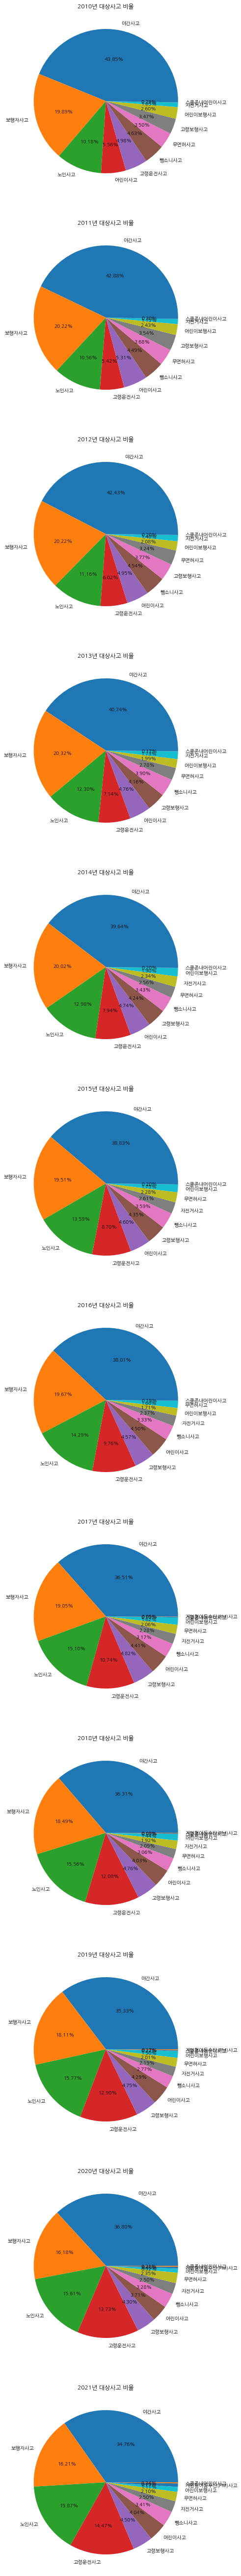

In [13]:
y_list = sorted(df['연도'].unique())
fig,axes = plt.subplots(len(y_list),1,figsize=(8,8*len(y_list)))
for i,y in enumerate(y_list):
    sub_df = df[(df['연도']==y)&(df['대상사고 구분명']!='전체')].groupby(['대상사고 구분명'],as_index=False)['사고건수'].sum().sort_values('사고건수',ascending=False)
    axes[i].pie(sub_df['사고건수'].values,labels=sub_df['대상사고 구분명'].values,autopct='%.2f%%')
    axes[i].set_title(f'{y}년 대상사고 비율')

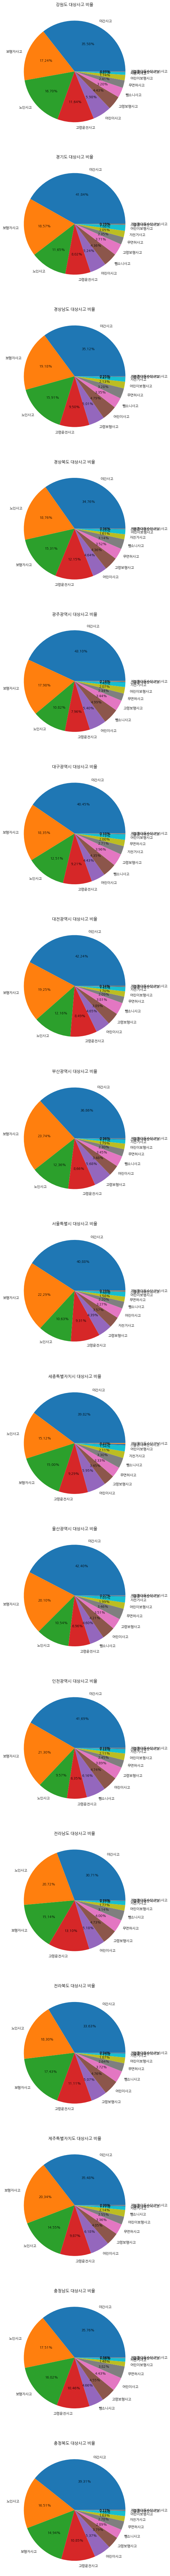

In [66]:
city_list = sorted(df['시도'].unique())
fig,axes = plt.subplots(len(city_list),1,figsize=(8,8*len(city_list)))
for i,y in enumerate(city_list):
    sub_df = df[(df['시도']==y)&(df['대상사고 구분명']!='전체')].groupby(['대상사고 구분명'],as_index=False)['사고건수'].sum().sort_values('사고건수',ascending=False)
    axes[i].pie(sub_df['사고건수'].values,labels=sub_df['대상사고 구분명'].values,autopct='%.2f%%')
    axes[i].set_title(f'{y} 대상사고 비율')

Index(['과속', '중앙선 침범', '신호위반', '안전거리 미확보', '안전운전 의무 불이행', '보행자 보호의무 위반', '기타',
       '차대사람', '차대차', '차량단독', '철길건널목'],
      dtype='object')


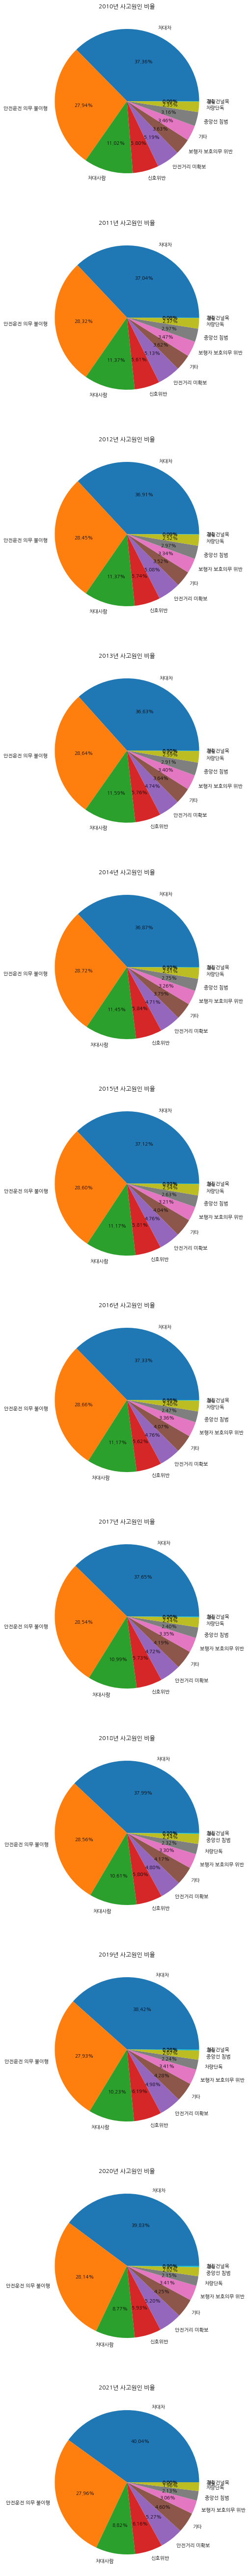

In [28]:
fig,axes = plt.subplots(len(y_list),1,figsize=(8,8*len(y_list)))
detail_cols = df.columns[-13:-2]
print(detail_cols)
for i,y in enumerate(y_list):
    sub_df = df[(df['연도']==y)&(df['대상사고 구분명']=='전체')].groupby('연도',as_index=False)[detail_cols].sum()
    tmp_df = pd.DataFrame({'사고원인':detail_cols,'건수':sub_df.values.squeeze()[-11:]}).sort_values('건수',ascending=False)
    axes[i].pie(tmp_df['건수'].values,labels=tmp_df['사고원인'].values,autopct='%.2f%%')
    axes[i].set_title(f'{y}년 사고원인 비율')

Text(0.5, 1.0, '대상사고별 치사율(%)')

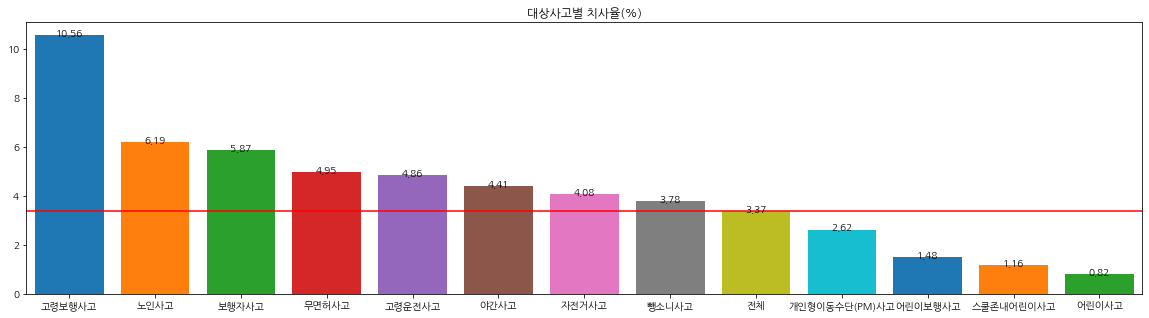

In [83]:
acc_list = sorted(df['대상사고 구분명'].unique())
sub_df = df.groupby('대상사고 구분명',as_index=False)['치사율'].mean().sort_values('치사율',ascending=False)
plt.figure(figsize=(20,5))
plt.bar(sub_df['대상사고 구분명'].values,sub_df['치사율'].values,color=mcolors.TABLEAU_COLORS.values())
h = sub_df[sub_df['대상사고 구분명']=='전체']['치사율'].values
plt.plot([i for i in range(-1,len(acc_list)+1)],[h for i in range(-1,len(acc_list)+1)],color='red')
for row1 in sub_df.iterrows():
    p_x1,p_y1 = row1[1]
    plt.text(p_x1,p_y1,f'{p_y1:.2f}',horizontalalignment='center')
plt.xlim(-0.5,12.5)
plt.title('대상사고별 치사율(%)')


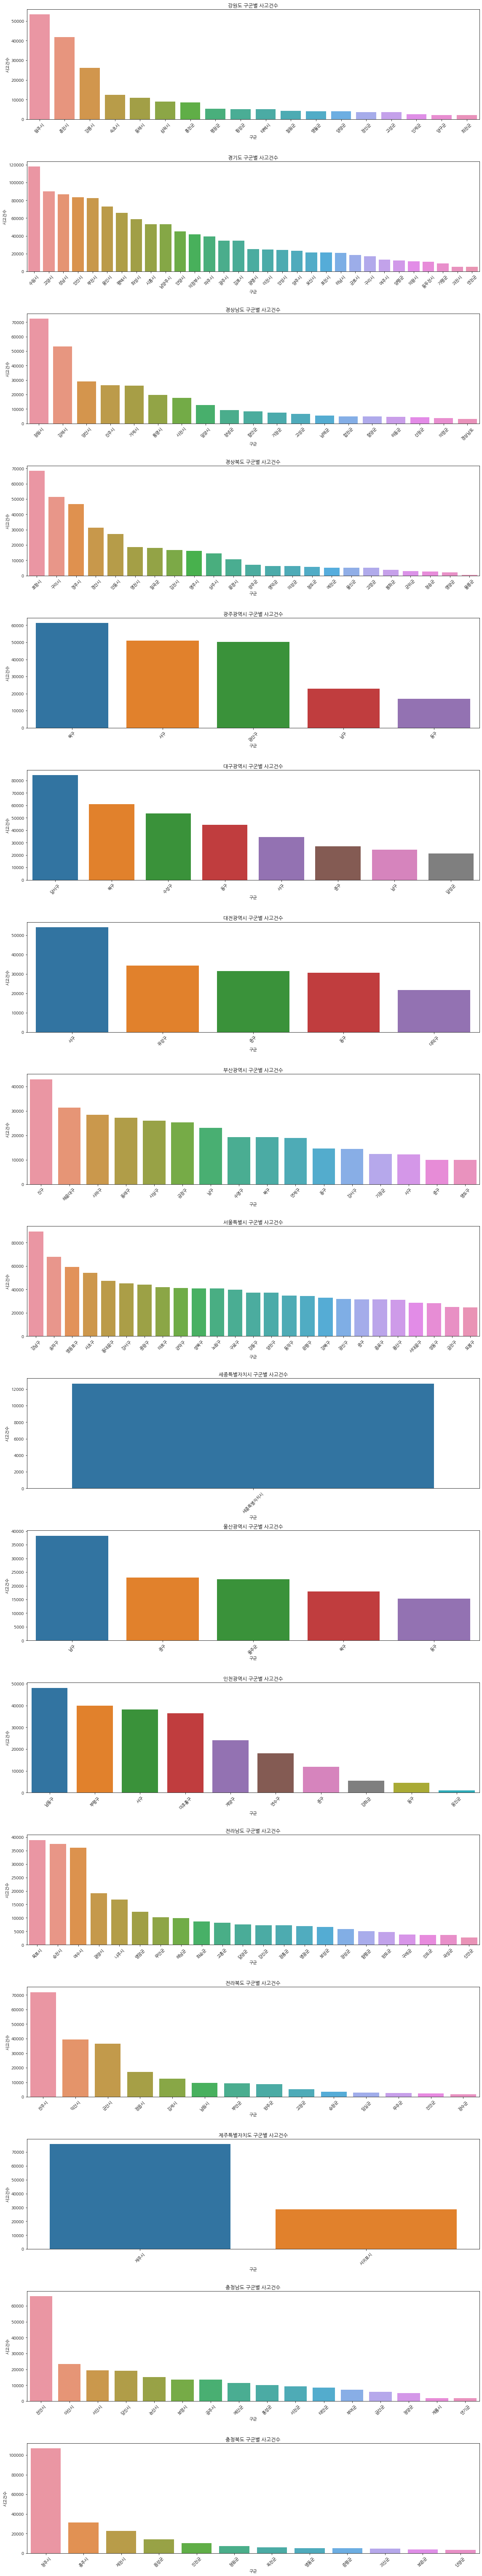

In [80]:
fig,axes = plt.subplots(len(city_list),1,figsize=(16,5*(len(city_list))))
for i,c in enumerate(city_list):
    sub_df = df[df['시도']==c].groupby(['구군'],as_index=False)['사고건수'].sum().sort_values('사고건수',ascending=False)
    sns.barplot(data=sub_df,x='구군',y='사고건수',ax=axes[i]).set(title=f'{c} 구군별 사고건수')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
plt.tight_layout()